# Deep Learning - Cijfer herkenning

### Van: Mart Veldkamp

# Inhoudsopgave

1. [Inleiding](#1)
2. [Het probleem](#2)
3. [Library's laden + data ophalen](#3)
    - [Versie's van de verschillende library's](#4)
    - [Verover de data](#5)
4. [Data visualiseren](#6)
5. [Maak test images](#7)
    - [Prepareer de test labels](#8)
6. [Model inladen](#9)
    - [Evalueer de voorspellingen](#10)
7. [Conclusie](#11)
8. [Bronnen](#12)

# 1. Inleiding <a class='anchor' id='1'></a>

Deze opdracht is onderdeel van het overkoepelende vak Deep Learning, dit is één van de meerdere opgaves die ik gebruik in dit vak om te laten zien hoe deep learning gebruikt kan worden voor verschillende doeleinde. Al deze opgaves zijn daarom ook op de lossen door middel van Deep Learning.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem <a class='anchor' id='2'></a>

Het probleem dat ik in deze notebook ga behandelen is het classificeren van handgeschreven cijfers aan de hand van een Neuraal netwerk en trainings data, we gaan dit Neurale netwerk trainen door middel van mnist dataset. Deze dataset staat bekend om dat het erg veel gebruikt wordt binnen de Image recognition. En gaan wij vandaag ook gebruiken.

# 3. Library's laden + data ophalen <a class='anchor' id='3'></a>

In [2]:
import numpy as np
import cv2

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.datasets import load_sample_image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

## Versie's van de verschillende library's <a class='anchor' id='4'></a>

In [3]:
print("Versie van Keras:", keras.__version__)
print("Versie van Numpy:", np.__version__)
print("Versie van matplotlibrary:",matplotlib. __version__)
print("Versie van opencv:",cv2.__version__)

Versie van Keras: 2.6.0
Versie van Numpy: 1.19.5
Versie van matplotlibrary: 3.4.3
Versie van opencv: 4.5.3


## Verover de data <a class='anchor' id='5'></a>

Deze dataset is afkomstig van DLO. Het gaat om de mnist dataset, in deze dataset zitten fotos van geclassificeerde cijfers van 0 tot 9. En wordt vooral gebruikt om modellen op te trainen en zo de accuracy te testen.

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 4. Data visualiseren <a class='anchor' id='6'></a>

In [5]:
print("De shape van de dataset ziet er als volgt uit: ", test_images.shape)
print("En zo zien de labels er uit: ", test_labels)
print("Als slot de shape van de test labels: ", test_labels.shape)

De shape van de dataset ziet er als volgt uit:  (10000, 28, 28)
En zo zien de labels er uit:  [7 2 1 ... 4 5 6]
Als slot de shape van de test labels:  (10000,)


Zoals je kan zien klopt zowel de shape als labels, omdat we 10.000 fotos hebben die allemaal 28 bij 28 zijn. En daarnaast elke label een cijfer van 0 tot 9 heeft. En als laatst de hoeveelheid labels die gezet zijn; 10.000.

# 5. Maak test images <a class='anchor' id='7'></a>

In [6]:
test_images_enhanced = test_images.reshape(10000,28,28,1)

In [7]:
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de test labels <a class='anchor' id='8'></a>

In [8]:
test_labels_encoded = to_categorical(test_labels)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 6. Model inladen <a class='anchor' id='9'></a>

In [11]:
new_model = models.load_model("MNIST_LeNet5_model.h5")

In [12]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

Zoals je kan zien is het model wat we inladen een best groot model, wat vooral bestaat uit Dense en conv2D layers.

In [13]:
loss, acc = new_model.evaluate(test_images_enhanced,
                         test_labels_encoded)

print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.7530 - accuracy: 0.9889
0.9889000058174133


Wow, het model heeft een accuracy van 98.89% Wat best veel is.

## Evalueer de voorspellingen <a class='anchor' id='10'></a>

In [14]:
direct_predictions = new_model.predict(test_images_enhanced)
print(direct_predictions[1234])

[1.6291172e-11 3.4380161e-08 1.2010595e-05 1.1861767e-04 1.1839702e-12
 1.1000308e-05 4.2340744e-04 2.2946087e-10 9.9943465e-01 2.8320738e-07]


In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(true_label)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(True)
  plt.xticks(range(10))
  plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

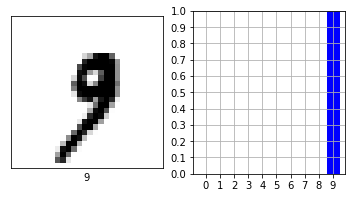

In [16]:
i = 1000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

In [17]:
mistakes = np.argmax(direct_predictions,axis=1) != test_labels.astype('int64')

mistakes_index = []

for index, value in enumerate(mistakes):
  if value == True:
    mistakes_index.append(index)
    
print(mistakes_index)

[92, 119, 247, 321, 340, 445, 495, 582, 583, 659, 674, 947, 1014, 1039, 1182, 1226, 1232, 1260, 1299, 1319, 1393, 1438, 1523, 1621, 1709, 1790, 1878, 1901, 1903, 1968, 2035, 2070, 2084, 2118, 2130, 2135, 2182, 2185, 2326, 2406, 2414, 2597, 2654, 2760, 2771, 2894, 2896, 2939, 2953, 2990, 3060, 3266, 3451, 3503, 3780, 3906, 3985, 4027, 4163, 4176, 4199, 4207, 4289, 4369, 4477, 4497, 4507, 4536, 4578, 4604, 4639, 4740, 4823, 4860, 4942, 5331, 5600, 5634, 5642, 5752, 5937, 5973, 5981, 5982, 5997, 6004, 6091, 6560, 6576, 6597, 6625, 6651, 6783, 7049, 7216, 7354, 7545, 8059, 8128, 8325, 8408, 8527, 9009, 9015, 9587, 9634, 9692, 9729, 9792, 9811, 9839]


Hier zie je elke 111 foute voorspellingen die het model heeft gemaakt. Je kan elk nummer makken en hieronder voor i invullen om te bekijken wat er fout ging. Ik ga dat in mijn geval doe voor de 2e.

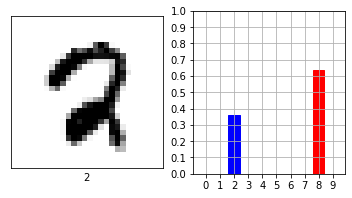

In [18]:
i = 119
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, direct_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, direct_predictions[i],  test_labels)
plt.show()

# Conclusie <a class='anchor' id='11'></a>

De conclusie die we kunnen trekken uit deze notebook is dat CNN's redelijk
goed zijn in het herkennen van cijfers, hoewel er wel veel fouten in zitten, 
en niet elke fout even goed uitlegbaar is. Zoals de foto hierboven, zou je 
als persoon eerder twijfelen tussen een 2 en een 7. Maar het model denkt 
met 63% zekerheid te weten dat het een 8 is.

Verder is een convolutional neuraal netwerk ook erg snel in vergelijking 
met andere modellen, hij is erg goed patronen herkennen (ook al zijn die 
soms onderliggend). En daarnaast is het aanpassen erg makkelijk van een 
CNN. En kan zo makkelijker gezocht worden naar betere resultaten.

# Bronnen <a class='anchor' id='12'></a>

- [Cijferherkenning Les 1](https://dlo.mijnhva.nl/d2l/le/content/354957/Home?itemIdentifier=TOC)
- [Mnist dataset](http://yann.lecun.com/exdb/mnist/)